In [94]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [30]:
data_df = pd.read_excel('Earthquake Damage Data.xlsx', sheet_name='Data')
data_df

,ID,P1,P2,P3,P4,P5,P6,BC1,BC2,BC3,BC4,BC5,BC6,BC7,BC8,DS
0,1,0.733800,0.588313,0.824660,0.420993,0.00,0.599542,0.257812,0,0.0,0,0.8,1.0,0.000000,0.827586,4
1,2,0.738113,0.604497,0.477239,0.252442,0.75,0.544622,0.148438,0,0.0,1,0.8,1.0,0.666667,0.931034,1
2,3,0.742815,0.602485,0.755395,0.434462,0.75,0.560641,0.093750,1,1.0,1,0.8,1.0,0.000000,0.655172,1
3,4,0.739635,0.602389,0.768629,0.484940,0.75,0.556064,0.148438,0,0.0,0,0.8,1.0,0.000000,0.965517,1
4,5,0.740052,0.605121,0.783227,0.486592,0.75,0.542334,0.148438,0,0.0,1,0.8,0.5,0.666667,0.931034,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30585,30598,0.339535,0.427073,0.891602,0.612456,0.00,0.606407,0.281250,1,0.0,0,0.8,0.5,0.000000,1.000000,1
30586,30599,0.365588,0.466539,0.806961,0.635176,0.00,0.501144,0.078125,1,0.0,0,1.0,1.0,1.000000,1.000000,1
30587,30600,0.290186,0.357288,0.889132,0.606094,0.00,0.718535,0.078125,1,0.0,0,0.4,1.0,0.000000,0.827586,1
30588,30601,0.281798,0.346521,0.985965,0.512369,0.00,0.727689,0.078125,1,0.0,0,0.4,1.0,0.000000,0.827586,1


In [48]:
# Extract features and target variable ('DS') 
X = data_df.drop(columns=['ID', 'DS']).values
y = data_df['DS'].values
print ('X',X)
print('y',y)

X [[0.73380022 0.58831328 0.82466048 ... 1.         0.         0.82758621]
 [0.73811333 0.60449731 0.47723881 ... 1.         0.66666667 0.93103448]
 [0.74281498 0.6024847  0.75539462 ... 1.         0.         0.65517241]
 ...
 [0.29018573 0.35728831 0.88913203 ... 1.         0.         0.82758621]
 [0.28179769 0.34652142 0.98596489 ... 1.         0.         0.82758621]
 [0.33091109 0.40020556 0.9478148  ... 0.5        0.         1.        ]]
y [4 1 1 ... 1 1 1]


In [64]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [56]:
# Split into training and testing sets
X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Convert numpy arrays to PyTorch tensors (subtracting 1 to make labels 0-indexed)
X_train = torch.tensor(X_train_np, dtype=torch.float32)
y_train = torch.tensor(y_train_np - 1, dtype=torch.long)  # Adjust target labels
X_test = torch.tensor(X_test_np, dtype=torch.float32)
y_test = torch.tensor(y_test_np - 1, dtype=torch.long)

In [52]:
# Create a DataLoader for training
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

In [82]:
# Load dataset
data_df = pd.read_excel('Earthquake Damage Data.xlsx', sheet_name='Data')

# Extract features and target variable
X = data_df.drop(columns=['ID', 'DS']).values
y = data_df['DS'].values

# Print original unique labels
print("Original unique DS values:", np.unique(y))

# Adjust the labels to be 0-indexed (if DS are 1-4, they become 0-3)
y_adjusted = y - 1
print("Unique DS values after subtracting 1:", np.unique(y_adjusted))

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(
    X_scaled, y_adjusted, test_size=0.2, random_state=42
)

# Convert numpy arrays to PyTorch tensors
X_train = torch.tensor(X_train_np, dtype=torch.float32)
y_train = torch.tensor(y_train_np, dtype=torch.long)
X_test = torch.tensor(X_test_np, dtype=torch.float32)
y_test = torch.tensor(y_test_np, dtype=torch.long)

# Create a DataLoader for training (assuming a batch size of 16)
from torch.utils.data import DataLoader, TensorDataset
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

Original unique DS values: [1 2 3 4]
Unique DS values after subtracting 1: [0 1 2 3]


In [72]:
# Set number of features and classes
num_features = X_train.shape[1]  # number of columns in the features
num_classes = 4  # adjust if needed

# Initialize the CNN model
model = CNN(num_features=num_features, num_classes=num_classes)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    for batch_X, batch_y in train_loader:
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Print progress every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
        

Epoch [10/100], Loss: 0.0809
Epoch [20/100], Loss: 0.3889
Epoch [30/100], Loss: 0.5222
Epoch [40/100], Loss: 0.2568
Epoch [50/100], Loss: 0.2710
Epoch [60/100], Loss: 0.0434
Epoch [70/100], Loss: 0.1619
Epoch [80/100], Loss: 0.0977
Epoch [90/100], Loss: 0.0422
Epoch [100/100], Loss: 0.4897


Confusion Matrix:
[[5482    1    0   50]
 [  21    0    0    0]
 [  39    0    0    0]
 [ 490    0    0   35]]
Accuracy: 0.9018
Precision: 0.8573
Recall: 0.9018
F1 Score: 0.8672


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


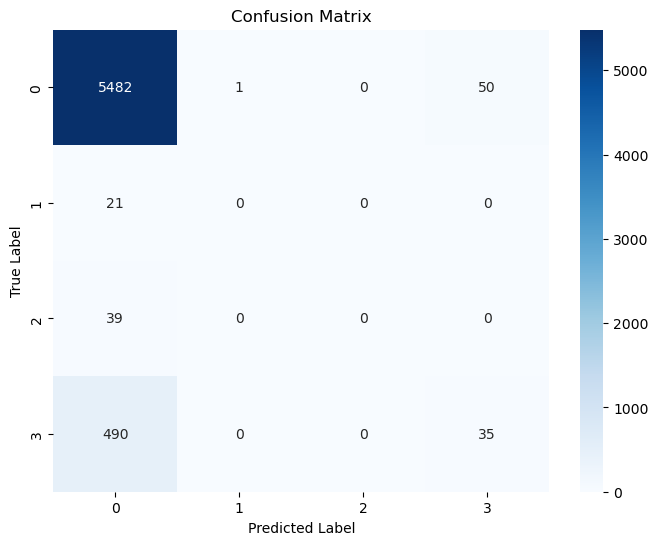

In [96]:
# Set the model to evaluation mode
model.eval()

# Disable gradient computations for inference
with torch.no_grad():
    outputs = model(X_test)
    # Convert outputs to predicted labels by selecting the index with the maximum value
    _, predicted = torch.max(outputs, 1)

# Convert tensors to numpy arrays for metric calculations
y_true = y_test.numpy()
y_pred = predicted.numpy()

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Optional: Plot the confusion matrix for a visual representation
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()